In [1]:
# Load packages for data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install neattext

In [3]:
# Load package for cleaning and nlp tasks
import neattext.functions as ntf

In [4]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
data = pd.read_csv("C:\ML\emotion_dataset.csv")

In [6]:
data.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,Unnamed: 0
count,34792.000000
mean,17395.500000
std,10043.729619
min,0.000000
25%,8697.750000
50%,17395.500000
75%,26093.250000
max,34791.000000


In [9]:
data.isna().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [10]:
data1 = data.drop(["Unnamed: 0","Clean_Text"],axis=1)

In [12]:
data1

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [13]:
data1["Emotion"].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

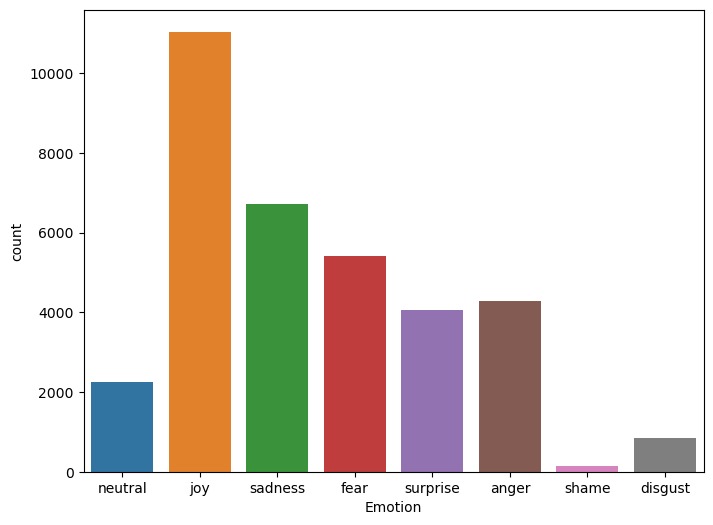

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x="Emotion",data=data)

In [15]:
# Data Cleaning
dir(ntf)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
# User handles
data1['Clean_Text'] = data1['Text'].apply(ntf.remove_userhandles)

In [22]:
# Stopwords
data1['Clean_Text'] = data1['Clean_Text'].apply(ntf.remove_stopwords)

In [23]:
# Features & Labels
X = data1['Clean_Text']
Y = data1['Emotion']

In [24]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=46)

In [25]:
# Build Pipeline
from sklearn.pipeline import Pipeline

### LogisticRegression Pipeline

In [26]:
# LogisticRegression Pipeline
pipe_lr = Pipeline([('cv',CountVectorizer()),('lr',LogisticRegression())])

In [27]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [28]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [29]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6273232420003833

### DecisionTreeClassifier

In [30]:
# DecisionTreeClassifier
pipe_dt = Pipeline([('cv',CountVectorizer()),('dt',DecisionTreeClassifier())])

In [31]:
# Train and Fit Data
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [32]:
# Check Accuracy
pipe_dt.score(x_test,y_test)

0.5449319793063805

### RandomForestClassifier

In [33]:
# RandomForestClassifier
pipe_rf = Pipeline([('cv',CountVectorizer()),('rf',RandomForestClassifier())])

In [34]:
# Train and Fit Data
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [35]:
# Check Accuracy
pipe_rf.score(x_test,y_test)

0.5911094079325542

### naive_bayes

In [36]:
# naive_bayes
pipe_nb = Pipeline([('cv',CountVectorizer()),('nb',MultinomialNB())])

In [37]:
# Train and Fit Data
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [38]:
# Check Accuracy
pipe_nb.score(x_test,y_test)

0.5730024908986396

### Results

In [39]:
ex1= "this is the happiest moment of my life"
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [40]:
ex2 = "I hope this ends now"
pipe_lr.predict([ex2])

array(['sadness'], dtype=object)

In [41]:
ex3 = "I am angry about your behaviour"
pipe_lr.predict([ex3])

array(['anger'], dtype=object)

In [42]:
ex4 = "She is afraid of you"
pipe_lr.predict([ex4])

array(['fear'], dtype=object)

In [43]:
ex5 = "Wow, you are beautiful"
pipe_lr.predict([ex5])

array(['surprise'], dtype=object)

In [44]:
ex6 = "That soup is too disgusting"
pipe_lr.predict([ex6])

array(['sadness'], dtype=object)

In [45]:
ex7 = "while"
pipe_lr.predict([ex7])

array(['neutral'], dtype=object)

In [46]:
ex8 = "I will kill you"
pipe_lr.predict([ex8])

array(['anger'], dtype=object)

In [47]:
ex9 = "Enough with this bull shit idiot"
pipe_lr.predict([ex9])

array(['anger'], dtype=object)

In [48]:
ex10 = "damn it"
pipe_lr.predict([ex10])

array(['anger'], dtype=object)

In [49]:
ex11 = "idiot"
pipe_lr.predict([ex11])

array(['neutral'], dtype=object)

In [50]:
ex12 = "It is the least recommended product for anyone"
pipe_lr.predict([ex12])

array(['fear'], dtype=object)